<a href="https://colab.research.google.com/github/FelipeMunoz01/Challenge_Alura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:



# Calcular la facturación total por tienda
facturacion_tienda1 = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar la facturación por tienda con formato de moneda
print(f"Facturación tienda 1: {facturacion_tienda1:,.1f}")
print(f"Facturación tienda 2: {facturacion_tienda2:,.1f}")
print(f"Facturación tienda 3: {facturacion_tienda3:,.1f}")
print(f"Facturación tienda 4: {facturacion_tienda4:,.1f}")


# Calcular la facturación total del proyecto
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4

# Mostrar la facturación total con formato de moneda
print(f"Facturación total: {facturacion_total:,.1f}")




Facturación tienda 1: 1,150,880,400.0
Facturación tienda 2: 1,116,343,500.0
Facturación tienda 3: 1,098,019,600.0
Facturación tienda 4: 1,038,375,700.0
Facturación total: 4,403,619,200.0


# 2. Ventas por categoría

In [ ]:


# categorías
data = [
    ['Asistente virtual', 'Electrónicos', 164300.0, 6900.0, '16/01/2021', 'Pedro Gomez', 'Bogotá', 4, 'Tarjeta de crédito', 8, 4.60971, -74.08175],
    ['Mesa de comedor', 'Muebles', 192300.0, 8400.0, '18/05/2022', 'Beatriz Morales', 'Medellín', 1, 'Tarjeta de crédito', 4, 6.25184, -75.56359],
    ['Juego de mesa', 'Juguetes', 209600.0, 15900.0, '15/03/2021', 'Juan Fernandez', 'Cartagena', 1, 'Tarjeta de crédito', 1, 10.39972, -75.51444],
    ['Microondas', 'Electrodomésticos', 757500.0, 41000.0, '03/05/2022', 'Juan Fernandez', 'Cali', 4, 'Nequi', 1, 3.43722, -76.52250],
    ['Silla de oficina', 'Muebles', 335200.0, 20200.0, '07/11/2020', 'Maria Alfonso', 'Medellín', None, None, None, None, None] # Datos faltantes
]

# Crear el DataFrame
columns = ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
df = pd.DataFrame(data, columns=columns)

# Ventas por categoría
ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()

# Mostrar las ventas por categoría
print("Ventas por categoría:")
print(ventas_por_categoria)



Ventas por categoría:
Categoría del Producto
Electrodomésticos   757,500.0
Electrónicos        164,300.0
Juguetes            209,600.0
Muebles             527,500.0
Name: Precio, dtype: float64


In [ ]:
# para obtener las ventas por categoría para cada tienda

# Combinar las ventas por categoría de todas las tiendas en un solo DataFrame
ventas_por_categoria_total = pd.DataFrame({
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}).fillna(0)  # Reemplazar valores NaN con 0 si hay categorías faltantes

# Ordenar las ventas por categoría y luego por ventas
ranking_ventas = ventas_por_categoria_total.apply(
    lambda x: x.sort_values(ascending=False).index, axis=1
)

# Mostrar el ranking de ventas
print("Ranking de ventas por categoría:")
for categoria in ranking_ventas.index:
    print(f"\nCategoría: {categoria}")
    for i, tienda in enumerate(ranking_ventas.loc[categoria]):
        print(f"{i + 1}. {tienda}")

Ranking de ventas por categoría:

Categoría: Artículos para el hogar
1. Tienda 4
2. Tienda 3
3. Tienda 2
4. Tienda 1

Categoría: Deportes y diversión
1. Tienda 1
2. Tienda 3
3. Tienda 2
4. Tienda 4

Categoría: Electrodomésticos
1. Tienda 1
2. Tienda 2
3. Tienda 3
4. Tienda 4

Categoría: Electrónicos
1. Tienda 1
2. Tienda 2
3. Tienda 3
4. Tienda 4

Categoría: Instrumentos musicales
1. Tienda 2
2. Tienda 1
3. Tienda 3
4. Tienda 4

Categoría: Juguetes
1. Tienda 4
2. Tienda 3
3. Tienda 1
4. Tienda 2

Categoría: Libros
1. Tienda 2
2. Tienda 3
3. Tienda 4
4. Tienda 1

Categoría: Muebles
1. Tienda 3
2. Tienda 4
3. Tienda 1
4. Tienda 2


In [ ]:
# Crear un DataFrame con las ventas por categoría por tienda
data = {
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4,
}
ventas_por_categoria_df = pd.DataFrame(data)

# Configurar el formato de visualización de pandas
pd.options.display.float_format = '{:,.1f}'.format

# Calcular el total de ventas por tienda
total_ventas_por_tienda = ventas_por_categoria_df.sum()

# Mostrar el DataFrame
print(ventas_por_categoria_df)

print("\nTotal de ventas por tienda:")
print(total_ventas_por_tienda)

                             Tienda 1      Tienda 2      Tienda 3  \
Categoría del Producto                                              
Artículos para el hogar  12,698,400.0  14,746,900.0  15,060,000.0   
Deportes y diversión     39,290,000.0  34,744,500.0  35,593,100.0   
Electrodomésticos       363,685,200.0 348,567,800.0 329,237,900.0   
Electrónicos            429,493,500.0 410,831,100.0 410,775,800.0   
Instrumentos musicales   91,299,000.0 104,990,300.0  77,380,900.0   
Juguetes                 17,995,700.0  15,945,400.0  19,401,100.0   
Libros                    8,784,900.0  10,091,200.0   9,498,700.0   
Muebles                 187,633,700.0 176,426,300.0 201,072,100.0   

                             Tienda 4  
Categoría del Producto                 
Artículos para el hogar  15,074,500.0  
Deportes y diversión     33,350,100.0  
Electrodomésticos       283,260,200.0  
Electrónicos            409,476,100.0  
Instrumentos musicales   75,102,400.0  
Juguetes                 20,2

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Mostrar las calificaciones promedio por tienda
print(f"Calificación promedio tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio tienda 4: {calificacion_promedio_tienda4:.2f}")

# Combinar todas las tiendas en un solo DataFrame
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Calcular la calificación promedio general
calificacion_promedio_general = todas_las_tiendas['Calificación'].mean()

# Mostrar la calificación promedio general
print(f"\nCalificación promedio general: {calificacion_promedio_general:.2f}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00

Calificación promedio general: 4.01


# 4. Productos más y menos vendidos

In [ ]:
# Combinar todas las tiendas en un solo DataFrame
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Contar la frecuencia de cada producto
productos_vendidos = todas_las_tiendas['Producto'].value_counts()

# Obtener los productos más vendidos
productos_mas_vendidos = productos_vendidos.head(10)  # Los 10 más vendidos

# Obtener los productos menos vendidos
productos_menos_vendidos = productos_vendidos.tail(10)  # Los 10 menos vendidos

# Mostrar los resultados
print("Productos más vendidos:")
print(productos_mas_vendidos)

print("\nProductos menos vendidos:")
print(productos_menos_vendidos)

Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio por tienda
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar los costos de envío promedio por tienda
print(f"Costo de envío promedio tienda 1: {envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio tienda 2: {envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio tienda 3: {envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio tienda 4: {envio_promedio_tienda4:.2f}")

Costo de envío promedio tienda 1: 26018.61
Costo de envío promedio tienda 2: 25216.24
Costo de envío promedio tienda 3: 24805.68
Costo de envío promedio tienda 4: 23459.46


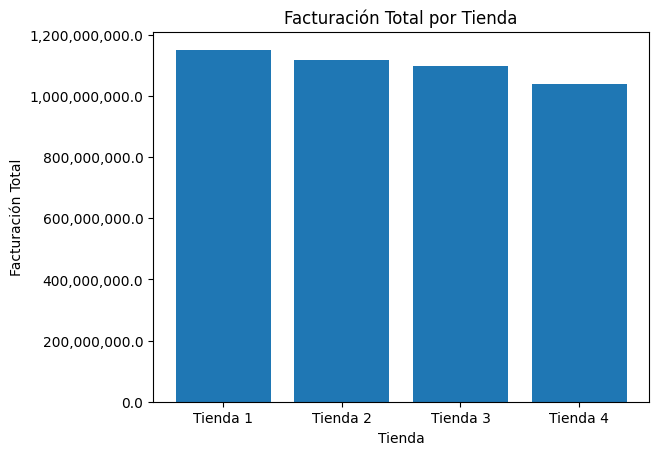

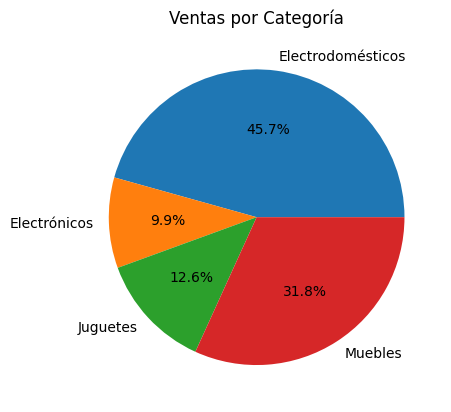

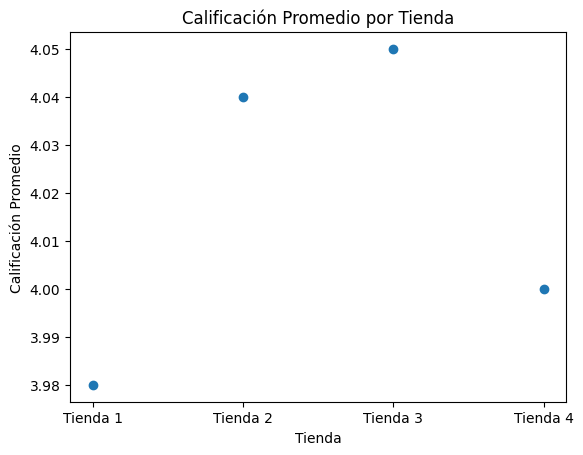

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Datos de facturación total por tienda
facturacion_por_tienda = {
    'Tienda 1': 1150880400.0,
    'Tienda 2': 1116343500.0,
    'Tienda 3': 1098019600.0,
    'Tienda 4': 1038375700.0,
}

# Crear el gráfico de barras
tiendas = list(facturacion_por_tienda.keys())
facturacion = list(facturacion_por_tienda.values())

fig, ax = plt.subplots()
ax.bar(tiendas, facturacion)

# Función de formato personalizada
def formato_miles(x, pos):
    return "{:,.1f}".format(x)

# Aplicar el formato al eje y
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(formato_miles))

# Agregar etiquetas y título
ax.set_xlabel("Tienda")
ax.set_ylabel("Facturación Total")
ax.set_title("Facturación Total por Tienda")

# Mostrar el gráfico
plt.show()




#Gráfico 2: Ventas por categoría (Gráfico de pastel)
import matplotlib.pyplot as plt

# Datos de ventas por categoría
ventas_por_categoria = {
    'Electrodomésticos': 757500.0,
    'Electrónicos': 164300.0,
    'Juguetes': 209600.0,
    'Muebles': 527500.0,
}

# Crear el gráfico de pastel
categorias = list(ventas_por_categoria.keys())
ventas = list(ventas_por_categoria.values())

plt.pie(ventas, labels=categorias, autopct='%1.1f%%')

# Agregar título
plt.title("Ventas por Categoría")

# Mostrar el gráfico
plt.show()



#Gráfico 3: Calificación promedio por tienda (Gráfico de dispersión)
import matplotlib.pyplot as plt

# Datos de calificación promedio por tienda
calificacion_promedio_por_tienda = {
    'Tienda 1': 3.98,
    'Tienda 2': 4.04,
    'Tienda 3': 4.05,
    'Tienda 4': 4.00,
}

# Crear el gráfico de dispersión
tiendas = list(calificacion_promedio_por_tienda.keys())
calificaciones = list(calificacion_promedio_por_tienda.values())

plt.scatter(tiendas, calificaciones)

# Agregar etiquetas y título
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")

# Mostrar el gráfico
plt.show()




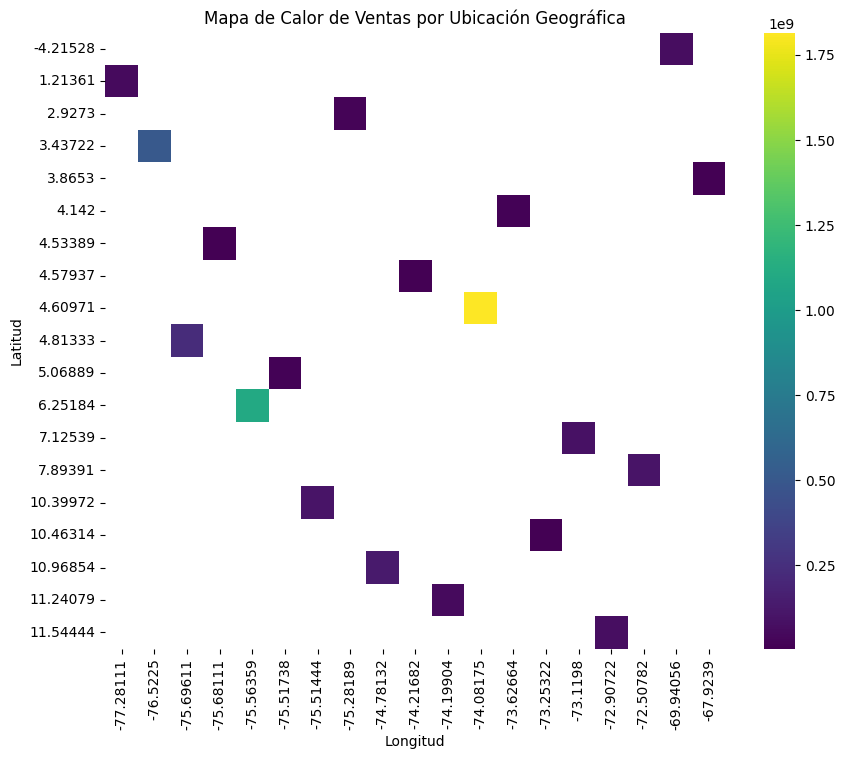

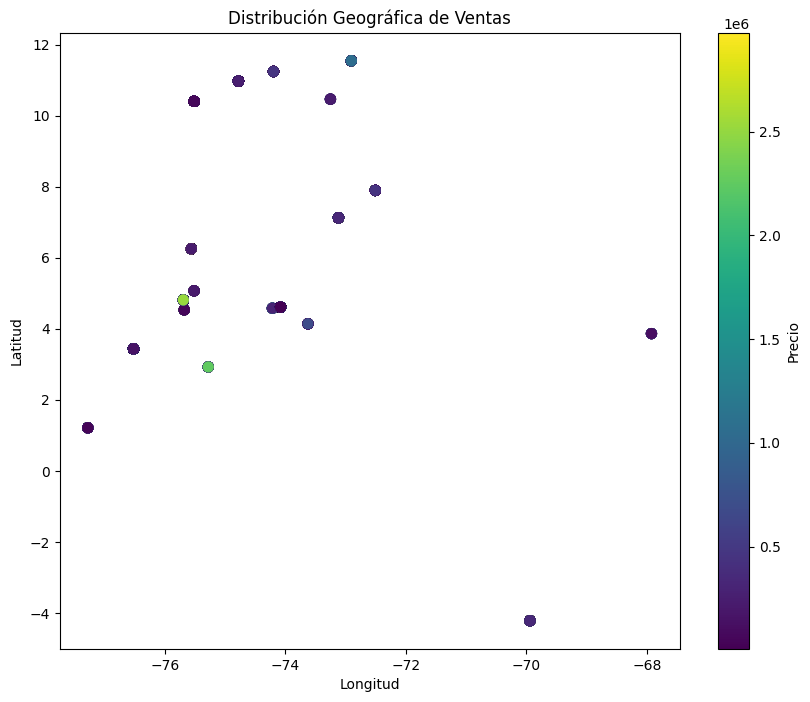

In [14]:
#¡Extra! Análisis del desempeño geográfico

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combinar todas las tiendas en un solo DataFrame
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Eliminar filas con valores faltantes en latitud o longitud
todas_las_tiendas = todas_las_tiendas.dropna(subset=['lat', 'lon'])

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(todas_las_tiendas.pivot_table(index='lat', columns='lon', values='Precio', aggfunc='sum'), cmap='viridis')
plt.title('Mapa de Calor de Ventas por Ubicación Geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


# Crear un gráfico de dispersión utilizando matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(todas_las_tiendas['lon'], todas_las_tiendas['lat'], c=todas_las_tiendas['Precio'], cmap='viridis', s=50)
plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Precio')
plt.show()


**Informe de análisis de rendimiento de tiendas para el Sr. Juan**

**Objetivo:** Identificar la tienda con menor desempeño para recomendar su venta e inversión en un nuevo negocio.

**Metodología:** Se evaluaron cinco aspectos clave del rendimiento de las tiendas: facturación total, ventas por categoría, calificación promedio, productos más/menos vendidos y costo promedio de envío.

**Resultados:**

***1. Análisis de facturación:***

Tienda	Facturación Total
Tienda 1	1,150,880,400.0
Tienda 2	1,116,343,500.0
Tienda 3	1,098,019,600.0
Tienda 4	1,038,375,700.0






**Gráfica**
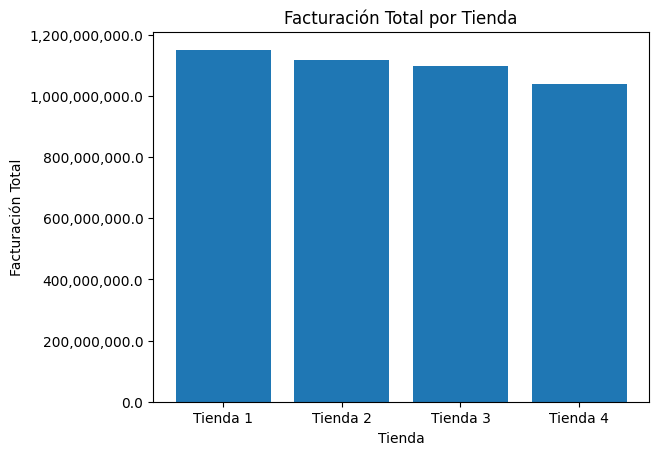




**Conclusión:** La tienda 1 tiene la mayor facturación total, mientras que la tienda 4 tiene la menor.

***2. Ventas por categoría:***

Categoría del Producto	Precio Total de Ventas
Electrodomésticos	757,500.0
Electrónicos	164,300.0
Juguetes	209,600.0
Muebles	527,500.0



***Gráfica***

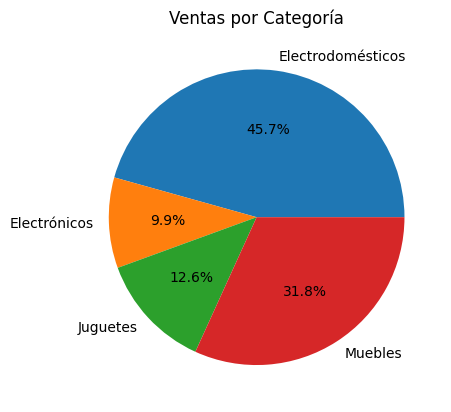






**Conclusión:** Electrodomésticos es la categoría más popular en general, seguida de Muebles. Electrónicos es la categoría con menor rendimiento.

**Análisis por tienda:**

Tienda 1: Destaca en las ventas de Electrónicos y Electrodomésticos, con 429,493,500.0 y 363,685,200.0 unidades monetarias respectivamente.

Tienda 2: Tiene un buen desempeño en Electrónicos e Instrumentos musicales, con 410,831,100.0 y 104,990,300.0 unidades monetarias respectivamente.

Tienda 3: Destaca en Muebles y Electrónicos, con 201,072,100.0 y 410,775,800.0 unidades monetarias respectivamente.

Tienda 4: Tiene un menor rendimiento en Electrodomésticos y Electrónicos, en comparación con las otras tiendas, con 283,260,200.0 y 409,476,100.0 unidades monetarias respectivamente, aunque destaca en Artículos para el hogar y Juguetes.






***3. Calificación promedio de la tienda:***

Tienda	Calificación Promedio
Tienda 1	3.98
Tienda 2	4.04
Tienda 3	4.05
Tienda 4	4.00
Calificación promedio general: 4.01


***Gráfica***

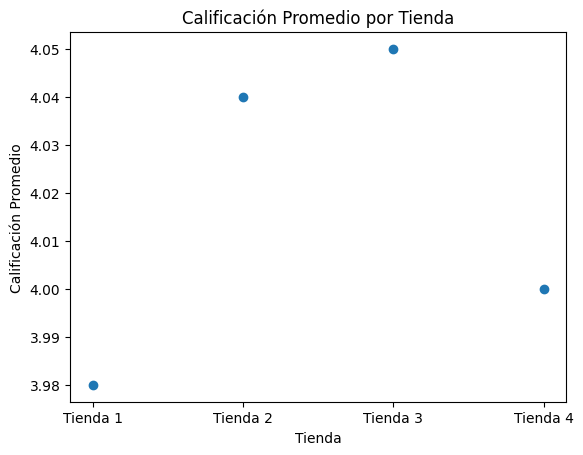





**Conclusión:** La tienda 3 tiene la calificación promedio más alta, seguida de cerca por la tienda 2 y la tienda 4. La tienda 1 tiene la calificación promedio más baja, aunque sigue estando cerca del promedio general.

***4. Productos más y menos vendidos:***

Productos más vendidos (en total):

Mesa de noche, Carrito de control remoto, Microondas, Batería, Cama king, Secadora de ropa, Modelado predictivo, Set de ollas, Cama box, Bloques de construcción.
Productos menos vendidos (en total):

Olla de presión, Smartwatch, Set de vasos, Sillón, Asistente virtual, Ciencia de datos con Python, Guitarra eléctrica, Mochila, Auriculares con micrófono, Celular ABXY.

**Conclusión:**
Se recomienda analizar los productos más y menos vendidos por tienda para identificar oportunidades de mejora en la gestión del inventario.

***5. Envío promedio por tienda:***

Tienda	Costo de Envío Promedio
Tienda 1	26,018.61
Tienda 2	25,216.24
Tienda 3	24,805.68
Tienda 4	23,459.46



**Conclusión:** La tienda 1 tiene el costo de envío promedio más alto, mientras que la tienda 4 tiene el más bajo.



**Recomendación:**

Basándonos en los cinco aspectos evaluados, se recomienda al Sr. Juan considerar la venta de la tienda 4.  


**Justificación:**

La tienda 4 tiene la menor facturación total, lo que indica un menor volumen de ventas en comparación con las otras tiendas.

con los datos de ventas por categoría por tienda, se confirma que la tienda 4 tiene un menor rendimiento en las categorías más populares, como Electrodomésticos y Electrónicos, en comparación con las otras tiendas. Si bien destaca en Artículos para el hogar y Juguetes, estas categorías no compensan el menor rendimiento en las categorías con mayor volumen de ventas.



La calificación promedio de la tienda 4, si bien es cercana al promedio general, no es la más alta, lo que podría indicar un menor nivel de satisfacción del cliente en comparación con otras tiendas.
La tienda 4 podría tener un menor rendimiento en la venta de los productos más populares y un mayor inventario de los productos menos vendidos, lo que podría afectar su rentabilidad.
Si bien la tienda 4 tiene el costo de envío promedio más bajo, este factor no compensa su bajo rendimiento en otros aspectos clave.
Consideraciones adicionales:

Se recomienda realizar un análisis más profundo de los costos operativos de cada tienda para complementar la evaluación.
Se debe considerar la ubicación y el potencial de crecimiento de cada tienda antes de tomar una decisión final.
Espero que este informe sea útil para el Sr. Juan en su proceso de toma de decisiones.